# Linear Regression
importing the required Libraries

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
# Reading the Dataset into Pandas

In [116]:
df = pd.read_csv('monet.csv')
df.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2


In [117]:
#To check the No. of rows and columns

In [118]:
df.shape

(430, 6)

In [119]:
#Check for Null values

In [120]:
df.isnull().values.any()

False

In [121]:
# summarized descriptive Statistics
df.describe()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,3.089996,27.646977,32.111395,0.820930,182.644186,1.611628
std,4.311260,10.097013,10.459677,0.383857,109.091529,0.591592
min,0.010413,3.900000,6.700000,0.000000,1.000000,1.000000
25%,0.600153,23.125000,28.525000,1.000000,87.250000,1.000000
50%,1.312782,25.600000,31.900000,1.000000,179.500000,2.000000
75%,3.850000,31.450000,36.200000,1.000000,274.750000,2.000000
max,33.013504,78.700000,89.000000,1.000000,387.000000,3.000000


In [122]:
#Correlation Matrix using Heatmap

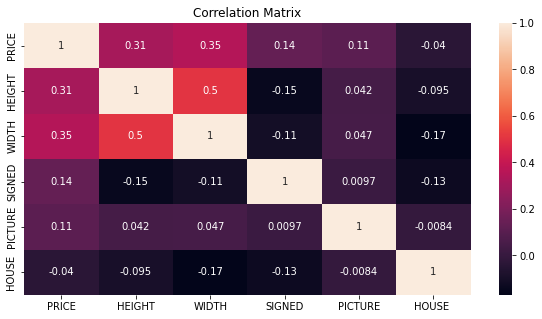

In [123]:
plt.figure(figsize = (10, 5))
sns.heatmap(df_corr, annot=True)
plt.title("Correlation Matrix")
plt.show()


In [124]:
#Creating a New Variable by Multiplying the W*H 

In [125]:
#Size =  Width X Height 
df_SVariable = df.assign(size=lambda df_: np.log(df_['HEIGHT'] * df_['WIDTH']))
df_SVariable.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,size
0,3.993780,21.3,25.6,1,1,1,6.301299
1,8.800000,31.9,25.6,1,2,2,6.705198
2,0.131694,6.9,15.9,0,3,3,4.697841
3,2.037500,25.7,32.0,1,4,2,6.712227
4,1.487500,25.7,32.0,1,4,2,6.712227


In [126]:
#The independent attributes are assigned to to 'X' and Dependent attributes are assigned to 'Y'
# Splitting the data

Mean squared error: 19.62
Goodness of fit: 0.07


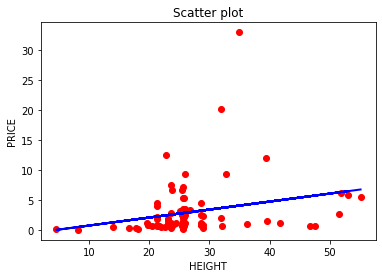

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(df_SVariable['HEIGHT'], df_SVariable['PRICE'], test_size=.2, random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

#Model 1 (Height)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_predicts = lr.predict(X_test)

#Model Evaluation
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicts))
print("Goodness of fit: %.2f" % r2_score(y_test, y_predicts))
#scatter plot
plt.scatter(X_test, y_test, color="red")
plt.plot(X_test, y_predicts, color="blue", linewidth=2)
plt.xlabel('HEIGHT')
plt.ylabel('PRICE')
plt.title("Scatter plot")
plt.show()

In [128]:
#linear regression model-2

Mean squared error: 18.71
Goodness of fit: 0.11


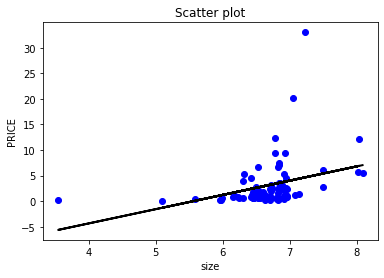

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(df_SVariable['size'], df_SVariable['PRICE'], test_size=.2, random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

#Model 2 (size)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_predicts = lr.predict(X_test)

#Model Evaluation
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicts))
print("Goodness of fit: %.2f" % r2_score(y_test, y_predicts))
#scatter plot
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test, y_predicts, color="black", linewidth=2)
plt.xlabel('size')
plt.ylabel('PRICE')
plt.title("Scatter plot")
plt.show()

In [130]:
#Multivariate Linear Regression Model

In [131]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_SVariable)
df = pd.DataFrame(df_normalized, columns=df_SVariable.columns)
df.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,size
0,0.209878,-0.629332,-0.623249,0.467044,-1.667002,-1.035072,-0.644811
1,1.325983,0.421707,-0.623249,0.467044,-1.657824,0.657251,0.042785
2,-0.686980,-2.057157,-1.551700,-2.141125,-1.648647,2.349574,-3.374535
3,-0.244412,-0.193052,-0.010662,0.467044,-1.639470,0.657251,0.054751
4,-0.372133,-0.193052,-0.010662,0.467044,-1.639470,0.657251,0.054751


In [132]:
#Multivariate Linear Regression Model
df.drop(['size'], axis = 1, inplace = True)
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_predicts = lr.predict(X_test)
#Model Evaluation
print("Mean squared error" , mean_squared_error(y_test, y_predicts))
print("Goodness of fit", r2_score(y_test, y_predicts))

[[-0.62933164 -0.62324871  0.46704423 -1.66700175 -1.03507215]
 [ 0.42170662 -0.62324871  0.46704423 -1.65782446  0.65725114]
 [-2.05715718 -1.55169986 -2.14112484 -1.64864716  2.34957443]
 ...
 [-0.20296706  0.71678388  0.46704423  1.76530549 -1.03507215]
 [-0.20296706  0.69764055  0.46704423  1.8662557   0.65725114]
 [-0.19305161 -0.01066239  0.46704423  1.87543299 -1.03507215]]
Mean squared error 0.9176722655319175
Goodness of fit 0.07560836804852422


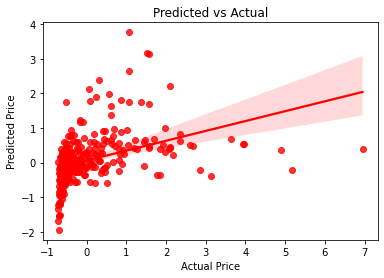

In [135]:
#Regplot
sns.regplot(x=y_test, y=y_predicts,color ='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual')
plt.show()

# the end